<a href="https://colab.research.google.com/github/GKS07/The-Sparks-Foundation/blob/main/DT_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**The Sparks Foundation**

##**Author : Gaurav Kumar Singh**

##**Task 6**
###**Decision Tree Classifier**
*We will create Decision Tree Classifier that will predict the right class of iris flowers if we feed new data to the model.*

###**Importing the libraries**

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


###**Importing the data**

In [2]:
#importing the data that i have downloaded from url
from google.colab import files
uploded = files.upload()
print("file is uploaded")

Saving Iris.csv to Iris (5).csv
file is uploaded


In [3]:
# reading the file
import io
data = pd.read_csv(io.BytesIO(uploded['Iris.csv']))
data = data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']]
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


###**Exploring the data**

In [4]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


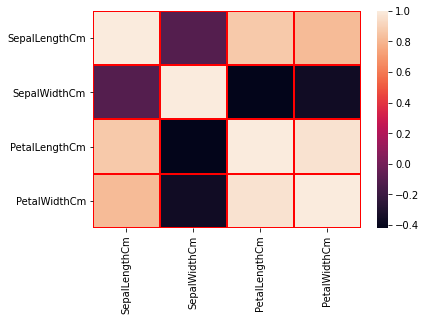

In [6]:
# Visualizing the correlation between the features.
sns.heatmap(data.corr(), linecolor='red', linewidths= 1)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1678: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Se

Text(3.8, 4.5, 'setosa')

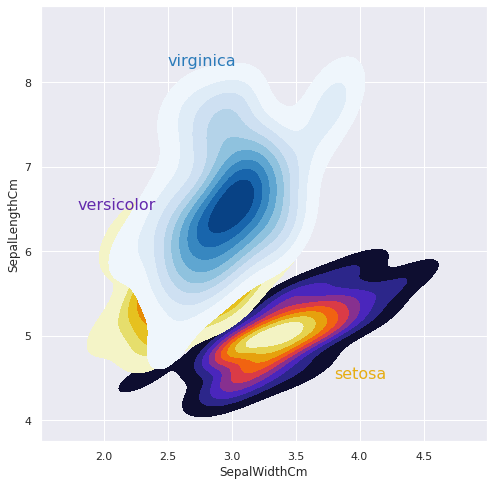

In [7]:
# kdeplot using seaborn
sns.set(style='darkgrid')
setosa = data.query("Species=='Iris-setosa'")
versicolor = data.query("Species=='Iris-versicolor'")
virginica = data.query("Species=='Iris-virginica'")
f, ax = plt.subplots(figsize=(8, 8))
# ax.set_aspect('equal')
ax = sns.kdeplot(setosa.SepalWidthCm, setosa.SepalLengthCm, cmap="CMRmap",
          shade=True, shade_lowest=False)
ax = sns.kdeplot(versicolor.SepalWidthCm, versicolor.SepalLengthCm, cmap="CMRmap_r",
          shade=True, shade_lowest= False)
ax = sns.kdeplot(virginica.SepalWidthCm, virginica.SepalLengthCm, cmap="Blues",
          shade=True, shade_lowest= False)

cmr_r = sns.color_palette("CMRmap_r")[-2]
blue = sns.color_palette("Blues")[-2]
cmr = sns.color_palette("CMRmap")[-2]
ax.text(2.5, 8.2, "virginica", size=16, color=blue)
ax.text(1.8, 6.5, "versicolor", size=16, color=cmr_r)
ax.text(3.8, 4.5, "setosa", size=16, color=cmr)

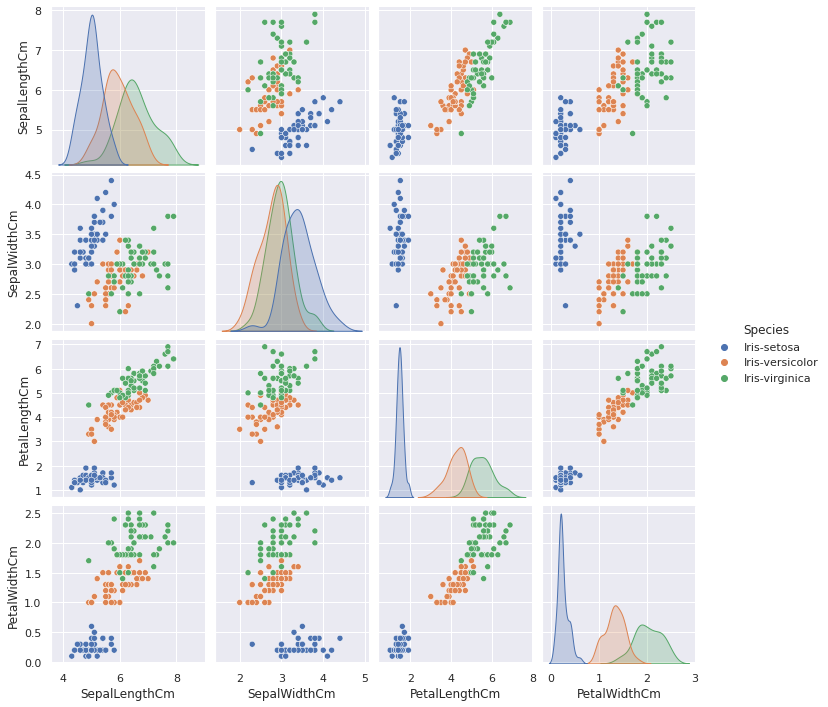

In [8]:
# visualizing the data using paired plot of seaborn
sns.set()
sns.pairplot(data,hue="Species", diag_kind="kde")

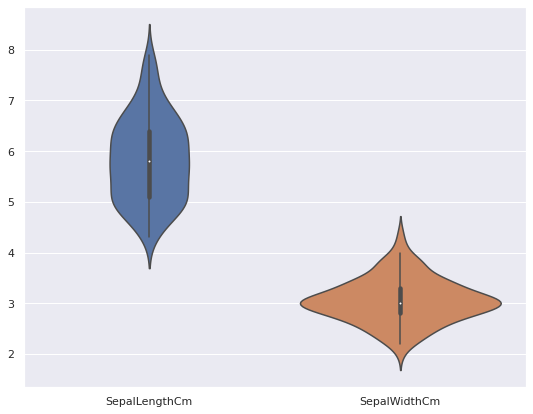

In [9]:
# comparing sepal length and width
fig, ax = plt.subplots(figsize =(9, 7)) 
sns.violinplot(ax = ax, data = data.iloc[:, 0:2])

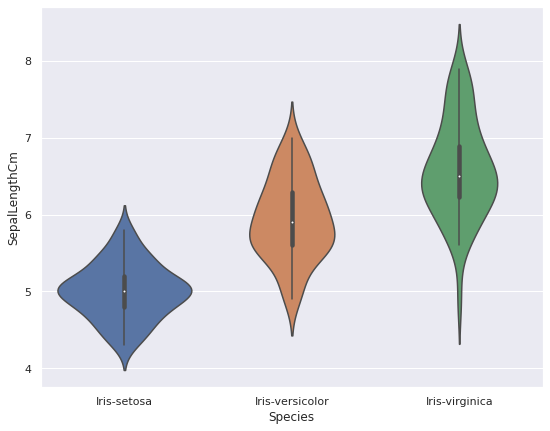

In [10]:
#Sepal length of species
fig, ax = plt.subplots(figsize =(9, 7)) 
sns.violinplot(ax = ax, x = data["Species"],  
                  y = data["SepalLengthCm"] )

###**Preprocessing the data**

In [11]:
x = data.iloc[:, [0,1,2,3]].values
y = data["Species"]

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
le = LabelEncoder()
y = le.fit_transform(y)

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [14]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

###**Creating the model**

In [15]:
dtree = DecisionTreeClassifier(criterion= 'entropy', max_depth= 2, splitter= 'random', min_samples_split= 5, min_samples_leaf= 2, max_features= 2)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [16]:
y_pred = dtree.predict(x_test)

In [17]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 1, 12,  0],
       [ 0,  2,  4]])

###**Visualizing the Desicion tree**

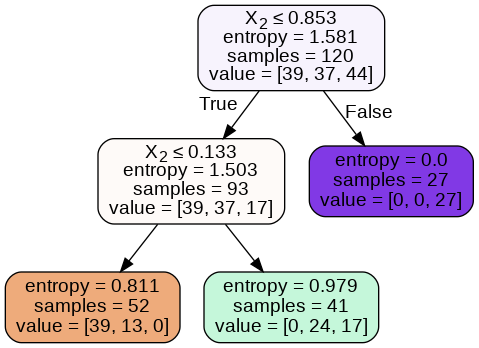

In [18]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

###**evaluating the model**

In [19]:
akl = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("the accuracy of the model is",akl)
print("the mean squared error is", mse)

the accuracy of the model is 0.9
the mean squared error is 0.1


###**prediction on new data**

In [20]:
# prediction on new data
new_pred = dtree.predict([[0.5,1,0.7,0.3]])
new_pred[0]

1